# Problem Statement – Telco Customer Churn EDA

* The business objective is to analyze customer churn in a telecommunications dataset and provide insights that can help retain customers.

* Each row in the dataset represents a customer with information on:

  * Demographics (gender, senior citizen, partner, dependents)

  * Services subscribed (phone, internet, streaming, online security, backups, device protection, tech support, etc.)

  * Account details (tenure, contract type, payment method, billing, charges)

  * Target column → Churn (Yes = customer left, No = customer stayed)


* The goal of this EDA is to answer key business questions such as:

  * What is the overall churn rate and how does it vary across demographics, services, and contracts?

  * How do billing patterns (monthly charges, total charges, payment methods) relate to churn?

  * Is there a critical tenure period where churn is highest?

  * Which service combinations or customer segments show the highest and lowest churn?

  * Are there any missing values or outliers that could affect the analysis?
  

* Visualizations (bar charts, heatmaps, boxplots, scatterplots, correlation maps) will be used to clearly highlight patterns, trends, and risk factors associated with customer churn.

## Importing Some Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



## Loading the Data and Understanding

In [ ]:
# Loading the csv data to pandas dataframe
df = pd.read_csv("/content/group2_dataset.csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Avoiding Truncation, Viewing all columns.

In [ ]:
pd.set_option("display.max_columns", None)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Dropping Cust Id column as its not required for modelling
df = df.drop(columns = ["customerID"])

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df["gender"].unique())

['Female' 'Male']


In [ ]:
# Printing the unique values in all the columns
for col in df.columns:
  print(col, df[col].unique())
  print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [ ]:
# Printing only for categorical features
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

### Converting 'TotalCharges' from object to numerical value and checking for missing value

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# df["TotalCharges"] = df["TotalCharges"].astype(float)
# ValueError: could not convert string to float: ' '

In [ ]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"]= df["TotalCharges"].replace(" ", "0.0")

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Checking the distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**


1.   Customer ID removed as not necessary
2.   No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target.



## Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Numerical Features - Analysis

### Understand the distribution of numerical features

In [ ]:
def plot_histogram(df,column_name):

  plt.figure(figsize=(6,4))
  sns.histplot(df[column_name],kde=True)
  plt.title(f'Distribution of {column_name}')

  # Calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # Add vertical lines for mean and median
  plt.axvline(col_mean, color='red', linestyle='--', label="Mean")
  plt.axvline(col_median, color='green', linestyle='--', label="Median")

  plt.legend()
  plt.show()

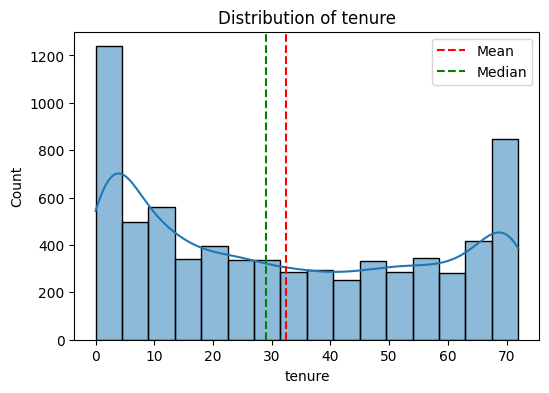

In [ ]:
plot_histogram(df,"tenure")

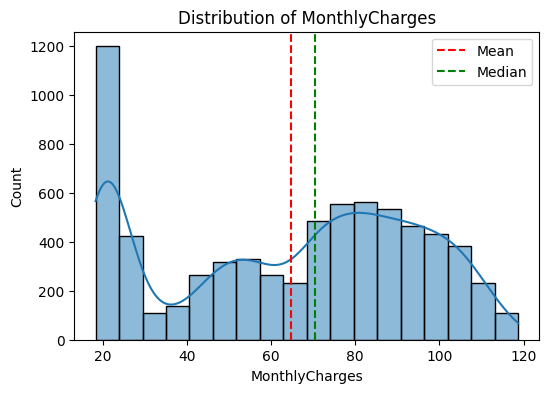

In [ ]:
plot_histogram(df,"MonthlyCharges")

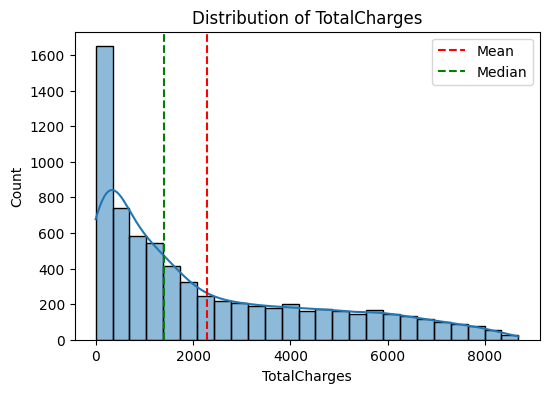

In [ ]:
plot_histogram(df,"TotalCharges")

## Plotting Boxplot for outlier detection(numerical features)




In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(6,4))
  sns.boxplot(df[column_name])
  plt.title(f'Boxplot of {column_name}')
  plt.ylabel(column_name)
  plt.show()

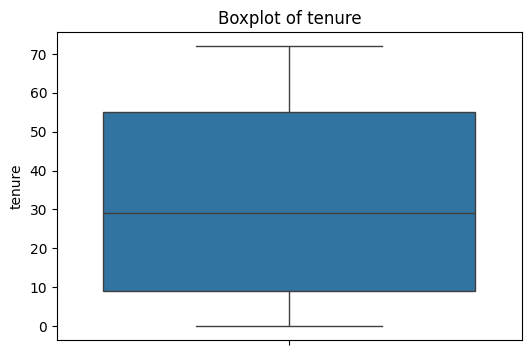

In [ ]:
plot_boxplot(df,"tenure")

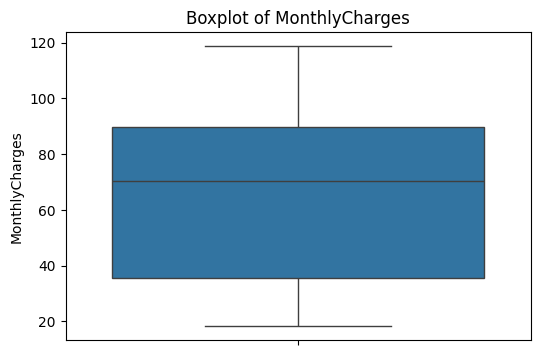

In [ ]:
plot_boxplot(df,"MonthlyCharges")

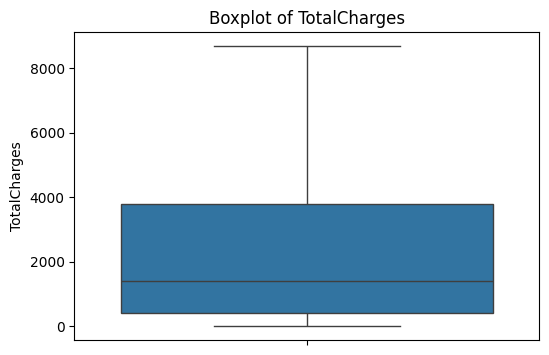

In [ ]:
plot_boxplot(df,"TotalCharges")

In [ ]:
# Q9. Compare MonthlyCharges, TotalCharges, and Tenure between churned vs non-churned
num_cols = ['MonthlyCharges','TotalCharges','tenure']
for col in num_cols:
    if col in df.columns:
        print(f"\n{col} by Churn:")
        print(df.groupby('Churn')[col].mean())



MonthlyCharges by Churn:
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

TotalCharges by Churn:
Churn
No     2549.911442
Yes    1531.796094
Name: TotalCharges, dtype: float64

tenure by Churn:
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


## Correlation Heatmap for numerical columns

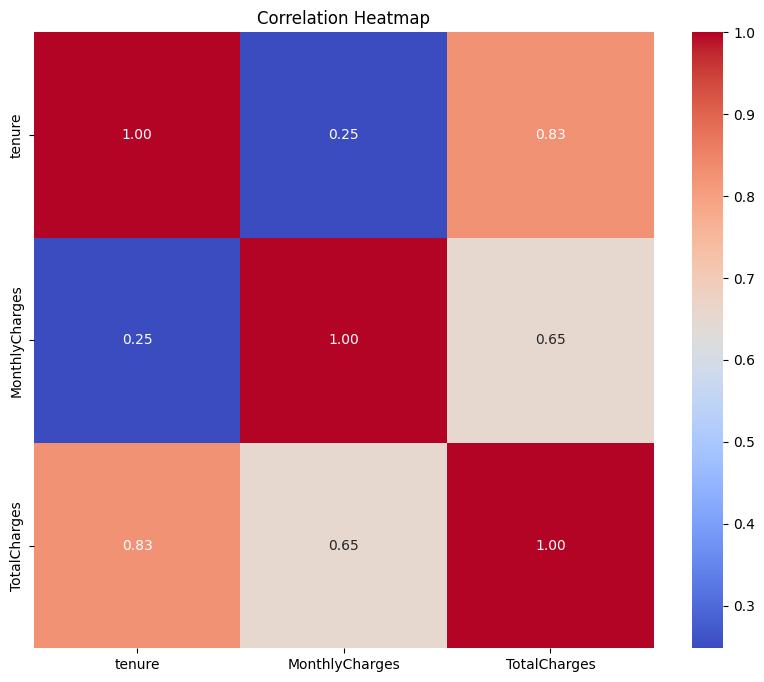

In [ ]:
# Correlation matrix - heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt =".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Q13 extension: correlations overall and by churn status
display(df[['tenure','MonthlyCharges','TotalCharges']].corr())



,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


## Categorical features - Analysis

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## Countplot for categorical columns

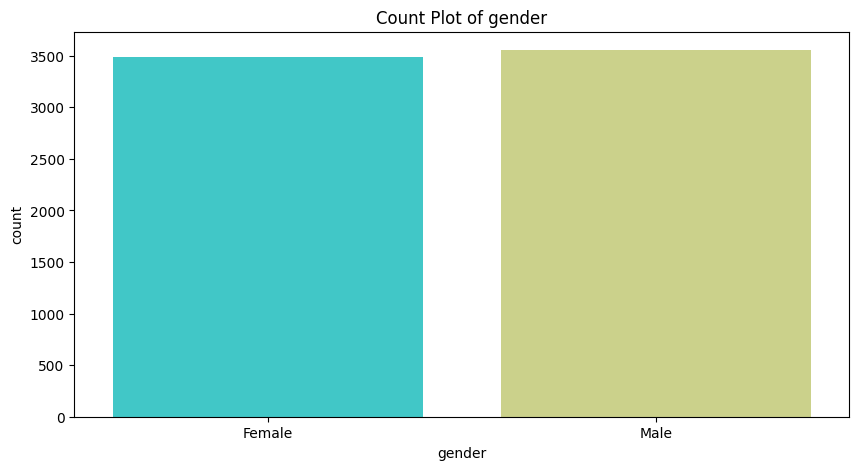

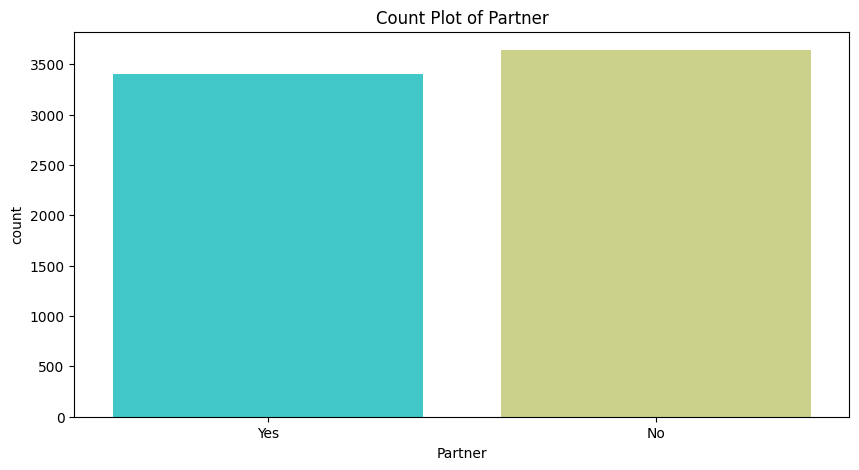

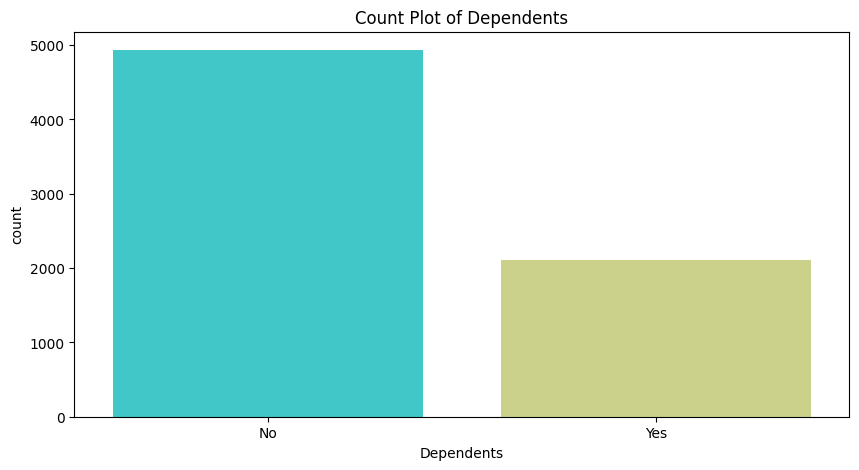

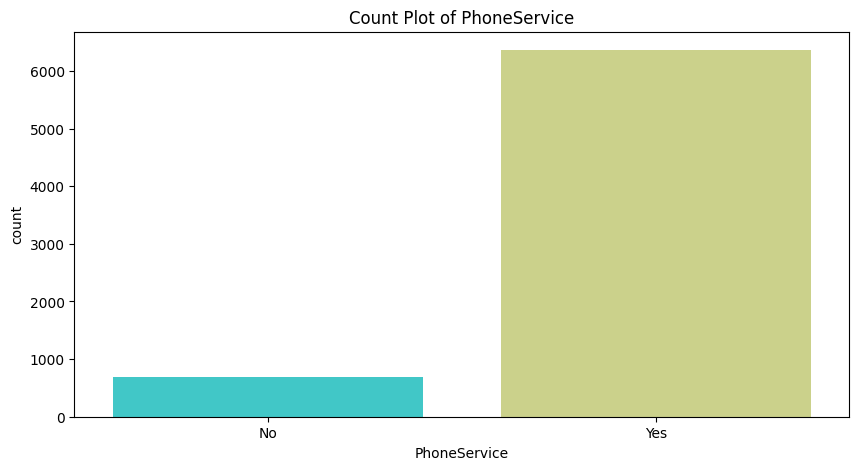

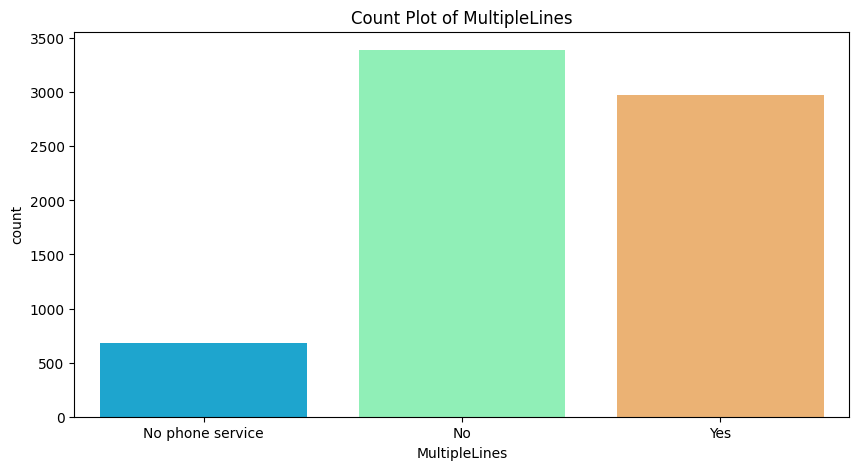

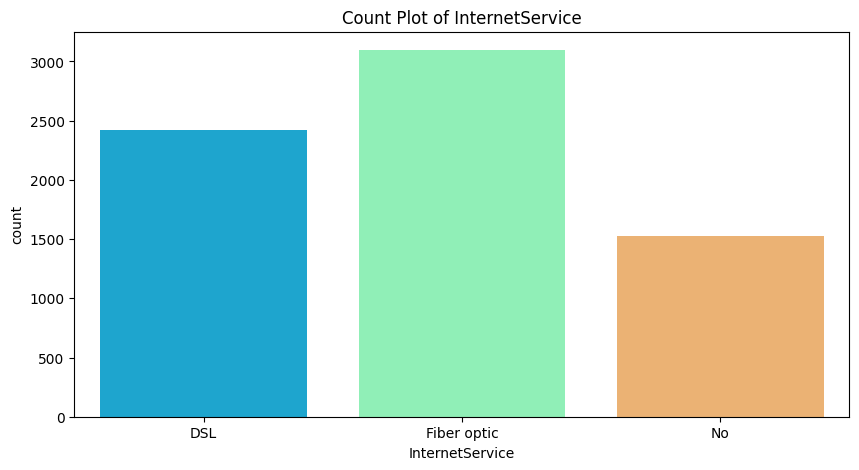

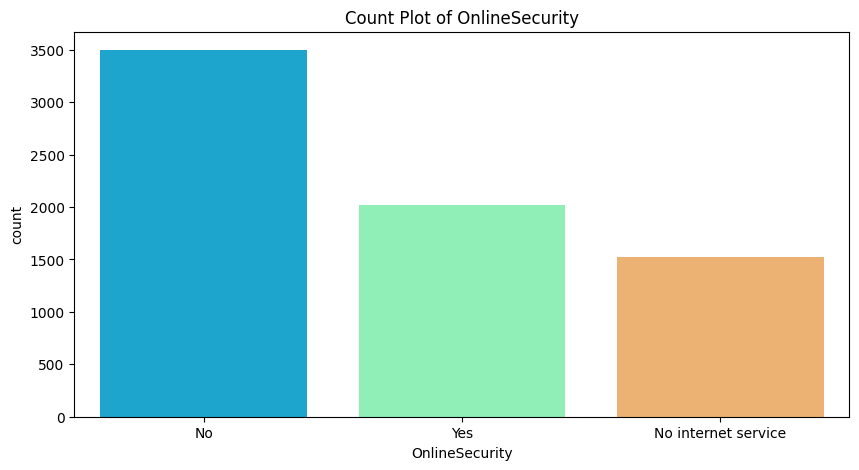

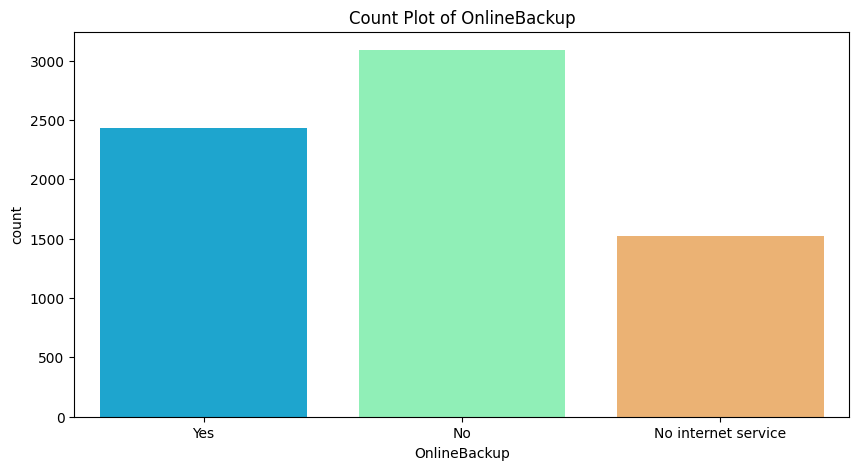

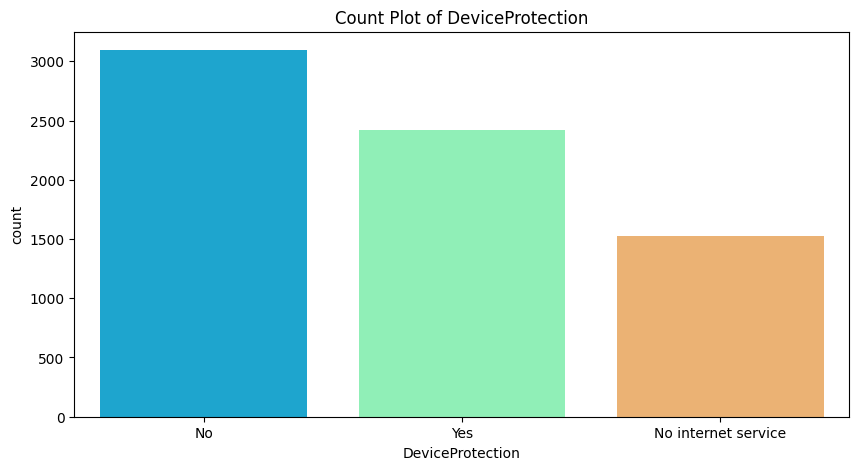

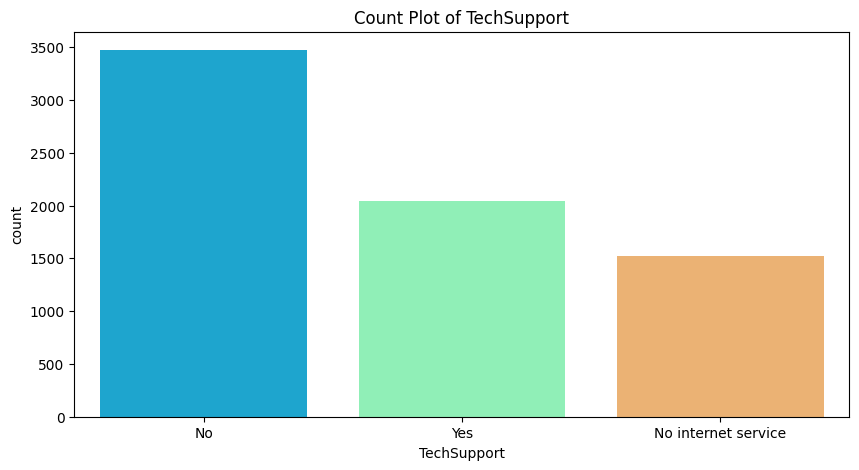

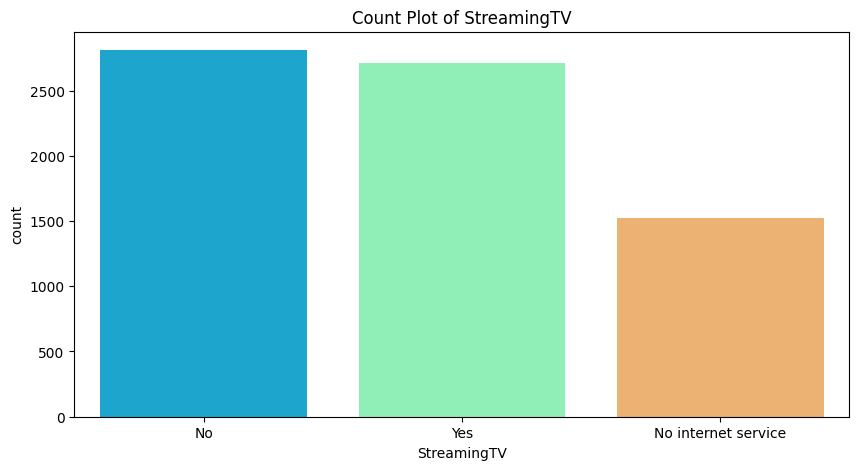

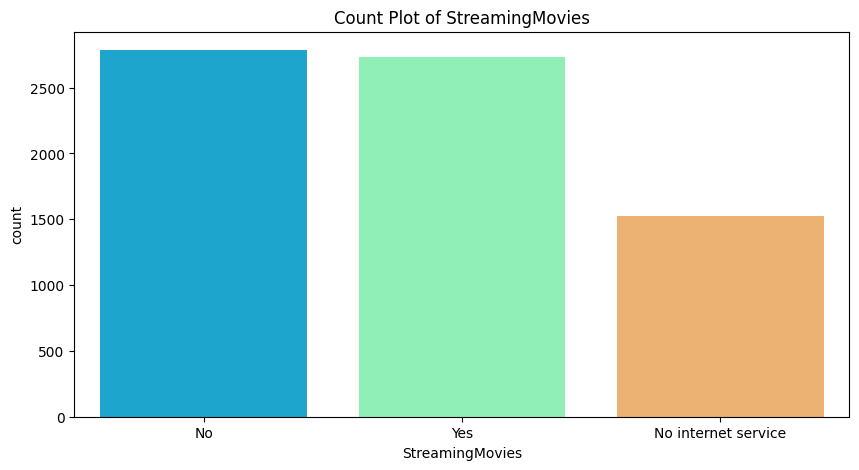

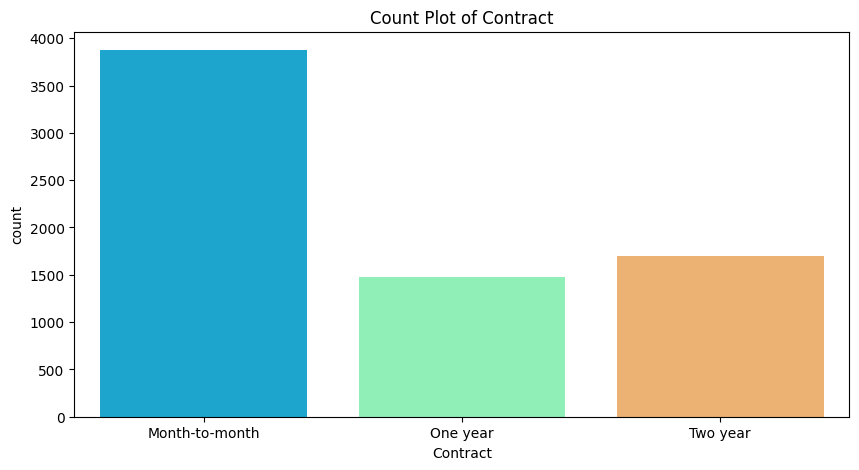

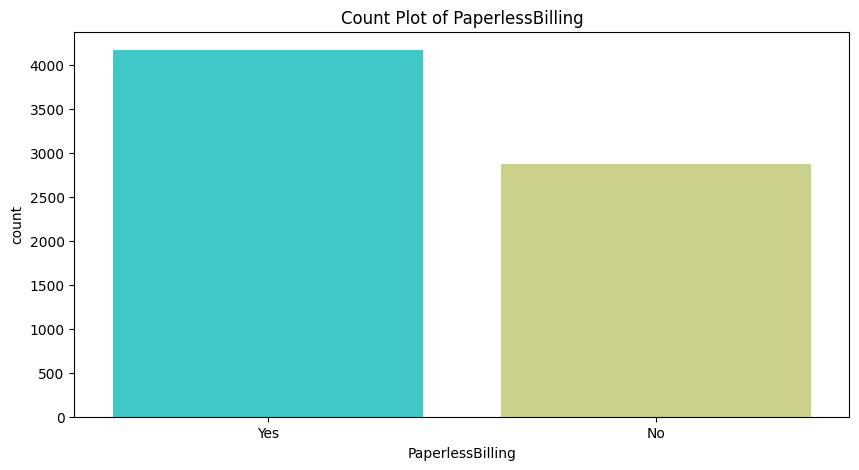

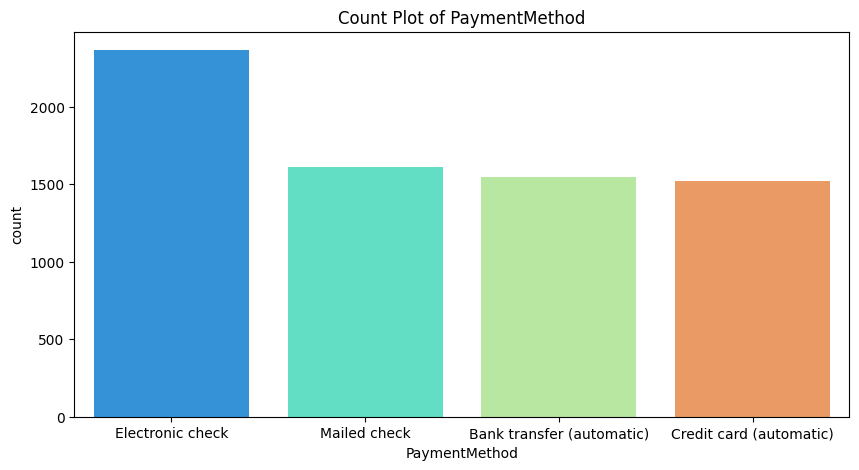

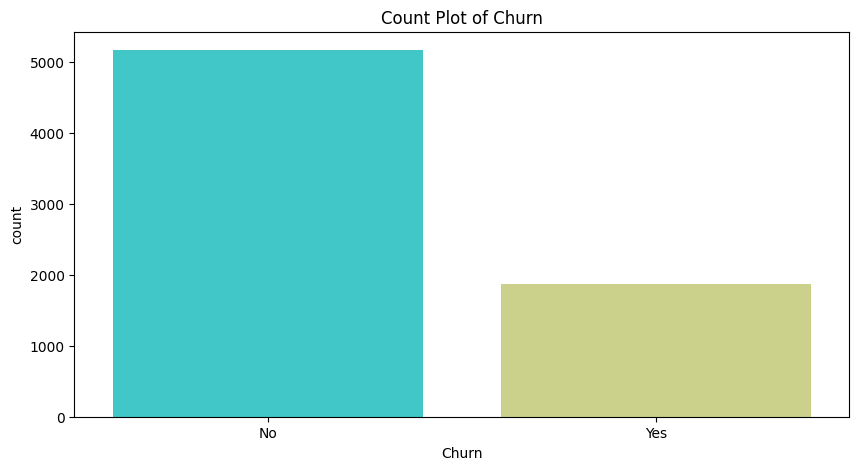

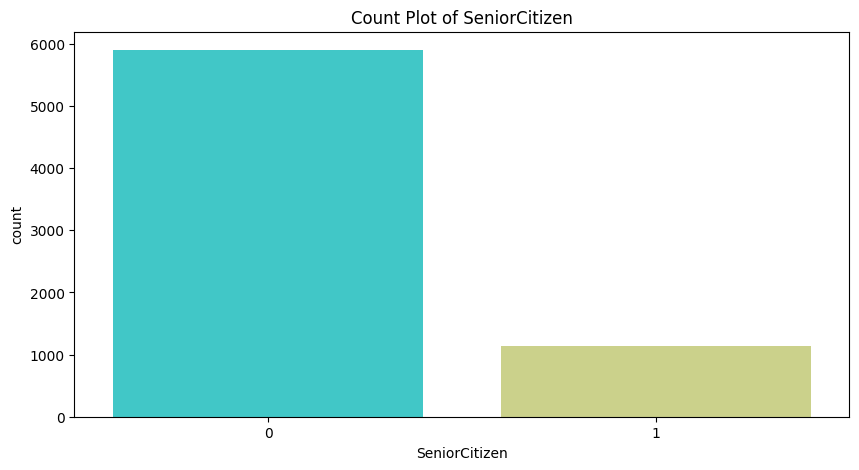

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


object_cols += ["SeniorCitizen"]

for col in object_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x= df[col], palette='rainbow')
  plt.title(f'Count Plot of {col}')
  plt.show

In [ ]:
print(df["gender"].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


# **Data Preprocessing**

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Label encoding of target column

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
#Q1. What is the overall churn rate (percentage of customers who left)?
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(f"Overall Churn Rate: {churn_rate[1]:.2f}%")

Overall Churn Rate: 26.54%


# Label Encoding of Categorical Features

In [ ]:
# Identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
import pickle
# Initialize a dictionary to save the encoders
encoders = {}

# Apply Label Encoding & Store the Encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1



Churn rate by gender:


,Churn
gender,
0,0.269209
1,0.261603


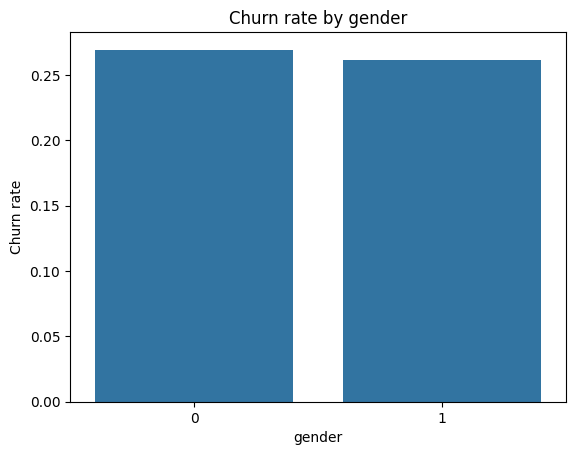


Churn rate by SeniorCitizen:


,Churn
SeniorCitizen,
1,0.416813
0,0.236062


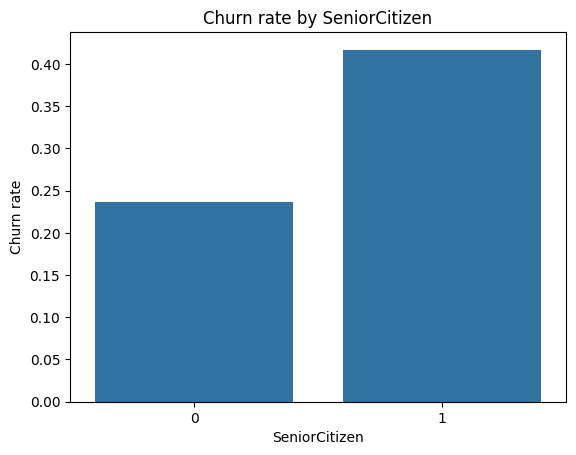


Churn rate by Partner:


,Churn
Partner,
0,0.329580
1,0.196649


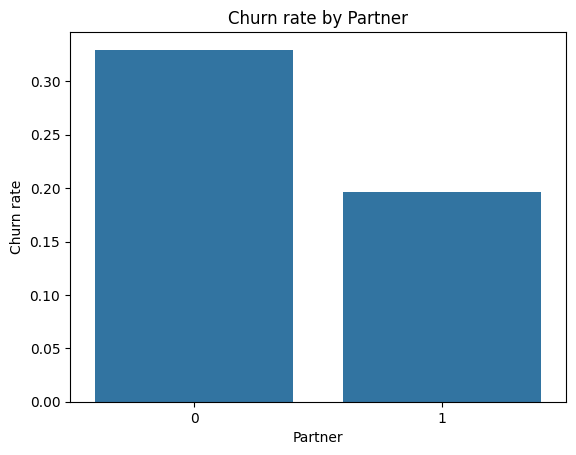


Churn rate by Dependents:


,Churn
Dependents,
0,0.312791
1,0.154502


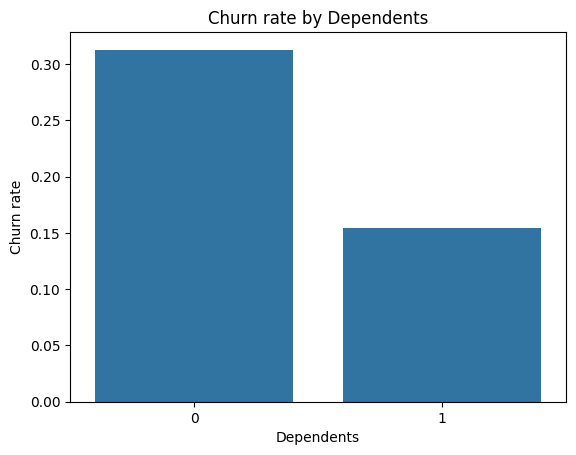

In [ ]:
# Q2. How does churn vary by customer demographic segments (gender, SeniorCitizen, Partner, Dependents)?

for col in ['gender','SeniorCitizen','Partner','Dependents']:
    if col in df.columns:
        print(f"\nChurn rate by {col}:")
        display(df.groupby(col)['Churn'].mean().sort_values(ascending=False))
        sns.barplot(x= df.groupby(col)['Churn'].mean().index, y=df.groupby(col)['Churn'].mean().values)
        plt.title(f'Churn rate by {col}')
        plt.ylabel('Churn rate')
        plt.xticks(rotation=0)
        plt.show()


In [ ]:
df.value_counts(["InternetService"])

,count
InternetService,
1,3096
0,2421
2,1526


,Churn
InternetService,
1,0.418928
0,0.189591
2,0.074050


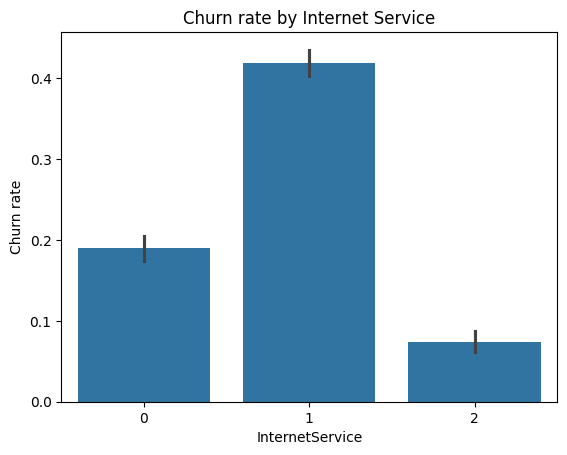

In [ ]:
# Q4. How does churn differ by type of internet service (DSL, Fiber optic, None)?
if 'InternetService' in df.columns:
    df['Churn'] = df['Churn'] if 'Churn' in df else df['Churn']
    display(df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False))
    sns.barplot(x='InternetService', y='Churn', data=df)
    plt.title('Churn rate by Internet Service')
    plt.ylabel('Churn rate')
    plt.show()


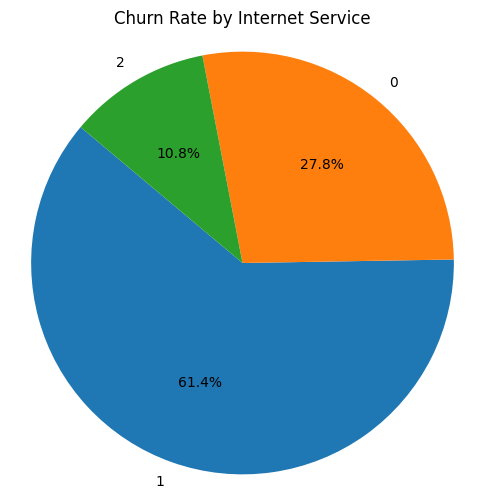

In [ ]:
# Q4. How does churn differ by type of internet service (DSL, Fiber optic, None) as piechart?
if 'InternetService' in df.columns:
    churn_by_internet = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6, 6))
    plt.pie(churn_by_internet, labels=churn_by_internet.index, autopct='%1.1f%%', startangle=140)
    plt.title('Churn Rate by Internet Service')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [ ]:
# Q3. Churn by Phone Service and Multiple Lines
if 'PhoneService' in df.columns and 'MultipleLines' in df.columns:
    print("Churn by PhoneService:")
    print(df.groupby('PhoneService')['Churn'].mean())
    print("\nChurn by MultipleLines:")
    print(df.groupby('MultipleLines')['Churn'].mean())


Churn by PhoneService:
PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64

Churn by MultipleLines:
MultipleLines
0    0.250442
1    0.249267
2    0.286099
Name: Churn, dtype: float64


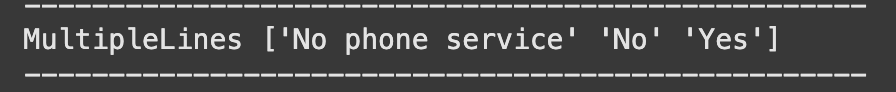

,Churn
Contract,
0,0.427097
1,0.112695
2,0.028319


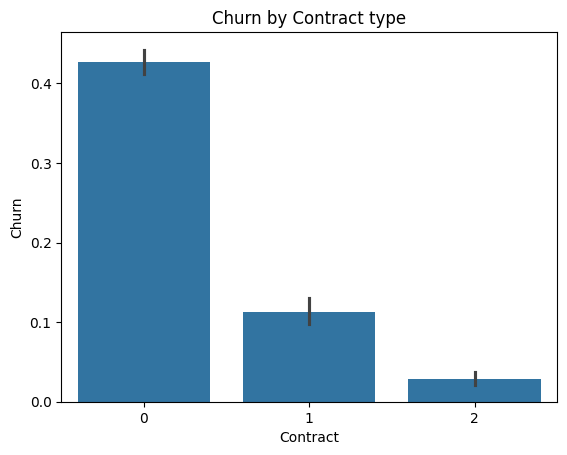

In [ ]:
# Q7. How does churn vary by contract type (Month-to-month, One year, Two year)?
if 'Contract' in df.columns:
    display(df.groupby('Contract')['Churn'].mean().sort_values(ascending=False))
    sns.barplot(x='Contract', y='Churn', data=df)
    plt.title('Churn by Contract type'); plt.show()


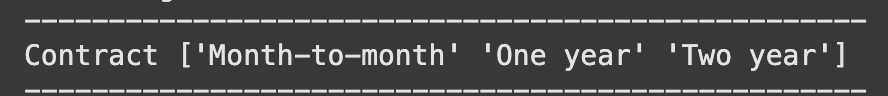

,Churn
PaymentMethod,
2,0.452854
3,0.191067
0,0.167098
1,0.152431


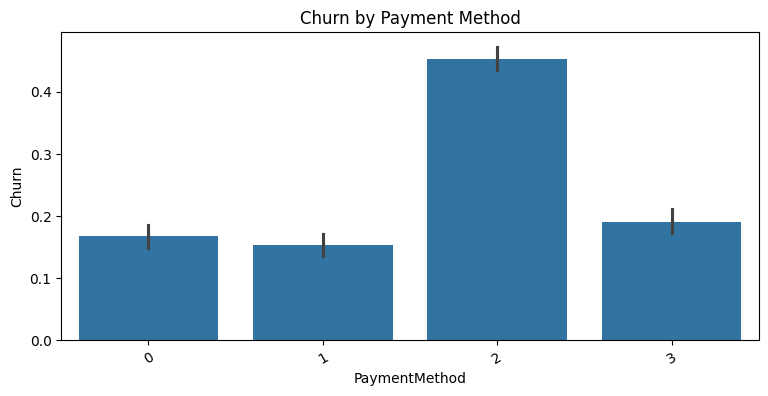

In [ ]:
# Q8. Is there a link between churn and payment method?
if 'PaymentMethod' in df.columns:
    display(df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False))
    plt.figure(figsize=(9,4))
    sns.barplot(x='PaymentMethod', y='Churn', data=df)
    plt.xticks(rotation=30); plt.title('Churn by Payment Method'); plt.show()


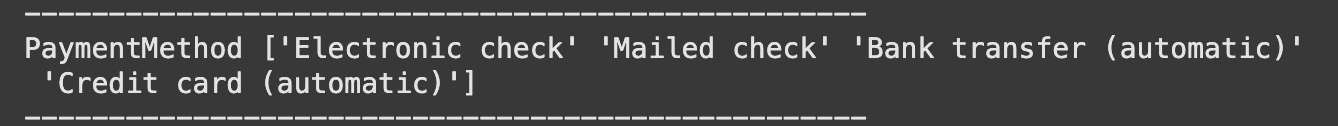

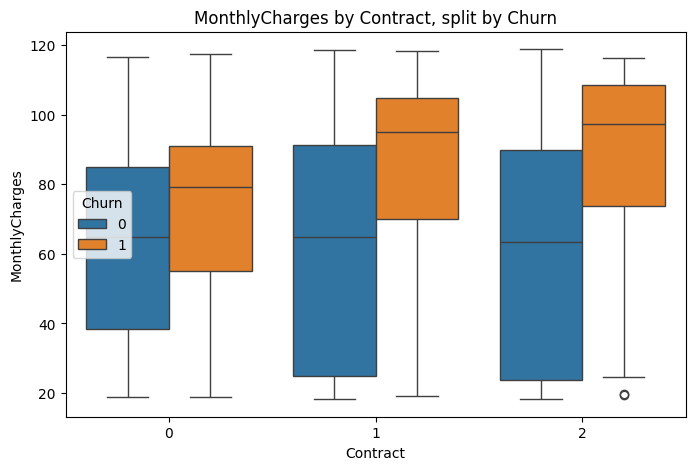

In [ ]:
# Q14. Interaction example: do customers with higher MonthlyCharges churn more on month-to-month?
if 'Contract' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
    plt.title('MonthlyCharges by Contract, split by Churn'); plt.show()


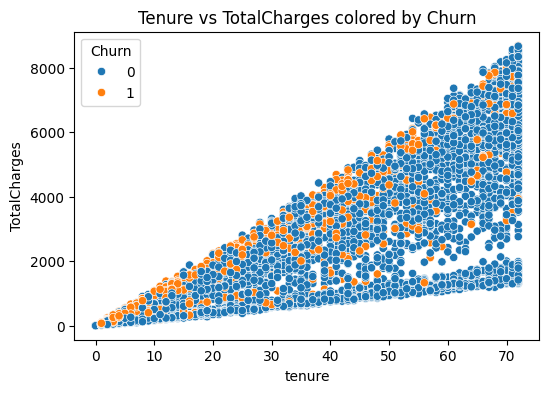

In [ ]:
# Q24. Scatterplot for tenure vs TotalCharges colored by churn
if 'tenure' in df.columns and 'TotalCharges' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
    plt.title('Tenure vs TotalCharges colored by Churn'); plt.show()


# Training and Test Data Split